<a href="https://colab.research.google.com/github/RoushilS/APCSP/blob/main/Haptics_Delay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simulation Basis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

dt = 0.001
T = 3
N = int(T / dt)

k = 1500.0
b = 5.0

#lag and noise
delay_ms = 40
delay_steps = int(delay_ms / 1000 / dt)
noise_std = 0.0005


In [ ]:
t = np.linspace(0, T, N)
user_pos = 0.01 * np.sin(2 * np.pi * 1.0 * t)  # 1 Hz motion


In [ ]:
delay_buffer = deque([0.0] * delay_steps, maxlen=delay_steps)


In [ ]:
force = np.zeros(N)
pos_used = np.zeros(N)
vel_used = np.zeros(N)


prev_pos = 0.0

for i in range(N):
    noisy_pos = user_pos[i] + np.random.normal(0, noise_std)

    delay_buffer.append(noisy_pos)

    x = delay_buffer[0]
    v = (x - prev_pos) / dt
    prev_pos = x

    force[i] = -k * x - b * v

    pos_used[i] = x
    vel_used[i] = v


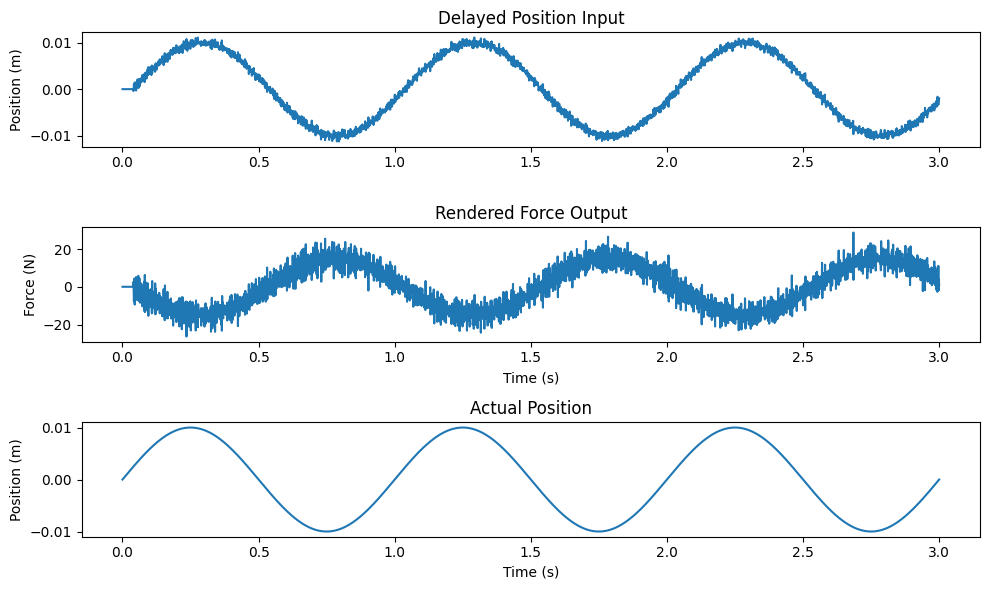

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(t, pos_used)
plt.title("Delayed Position Input")
plt.ylabel("Position (m)")

plt.subplot(3, 1, 2)
plt.plot(t, force)
plt.title("Rendered Force Output")
plt.xlabel("Time (s)")
plt.ylabel("Force (N)")

plt.subplot(3, 1, 3)
plt.plot(t, user_pos)
plt.title("Actual Position")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")

plt.tight_layout()
plt.show()


# Corrective Models


In [ ]:
# kalman

x_est = user_pos[0]
p = 1.0
Q = 0.1
R = 0.4


kalman_est = np.zeros(N)


for i in range(N):

    x_pred = x_est
    p_pred = p + Q


    K = p_pred / (p_pred + R)
    x_est = x_pred + K * (pos_used[i] - x_pred)
    p = (1 - K) * p_pred


    kalman_est[i] = x_est


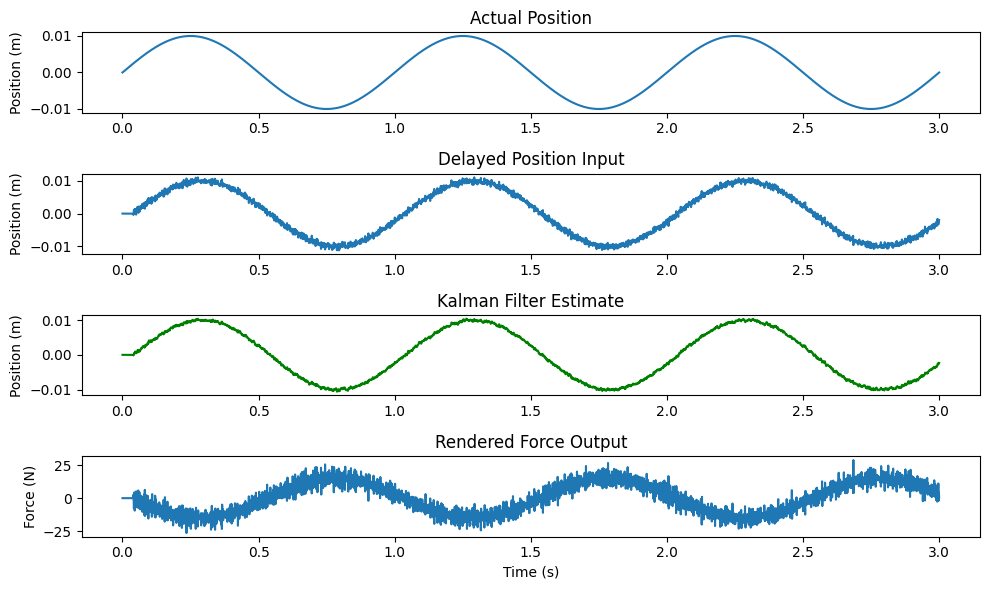

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(4, 1, 1)
plt.plot(t, user_pos)
plt.title("Actual Position")
plt.ylabel("Position (m)")

plt.subplot(4, 1, 2)
plt.plot(t, pos_used)
plt.title("Delayed Position Input")
plt.ylabel("Position (m)")

plt.subplot(4, 1, 3)
plt.plot(t, kalman_est, color='green')
plt.title("Kalman Filter Estimate")
plt.ylabel("Position (m)")

plt.subplot(4, 1, 4)
plt.plot(t, force)
plt.title("Rendered Force Output")
plt.xlabel("Time (s)")
plt.ylabel("Force (N)")

plt.tight_layout()
plt.show()


# Accuracy

---



In [ ]:
import numpy as np


squared_errors = (kalman_est - user_pos)**2

mse = np.mean(squared_errors)
rmse = np.sqrt(mse)

print(f"RMSE): {rmse:.6f} m")


RMSE): 0.001804 m
